In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [117]:
dataset=pd.read_csv(r'C:\Users\HP\Downloads\loan-train.csv')

In [118]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


By having an initial cursory look at the data set, we can see that there are quite a few missing values. Let us see how can we handle them.

In [119]:
dataset.shape

(614, 13)

So, the size of the dataset is not very big. This means that, firstly, we should not delete too many rows due to missing or invalid values. Furthermore, we can probably try individual dealing solutions at some points to address the issue of missing data or invalid data.

In [120]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [121]:
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Now, let us check the impact of credit history on the loan eligibility.

In [122]:
pd.crosstab(dataset['Credit_History'],dataset['Loan_Status'],margins=True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,97,378,475
All,179,385,564


So, we can see that applicants with the credit history of 1 tend to have higher chance to be eligible for the loan.

Let us now get some insight of how the group under study looks like, in terms of loan eligibility parameters.

<AxesSubplot:>

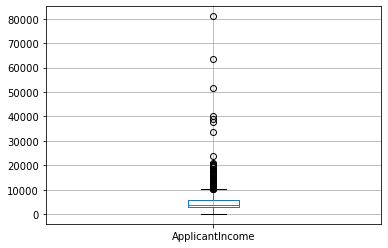

In [123]:
dataset.boxplot(column='ApplicantIncome')

There seems to be quite a few income outliers, mostly at high-income end. We need to find a way to deal with them later. But let us plt this column in another way to have a better understanding of the data.

<AxesSubplot:>

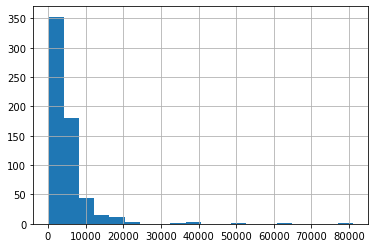

In [124]:
dataset['ApplicantIncome'].hist(bins=20)

The histogram plot is more illustrative in showing that the percentage of outliers is very low in comparison with the total number of records.

Now let us take a look as co-applicants.

<AxesSubplot:>

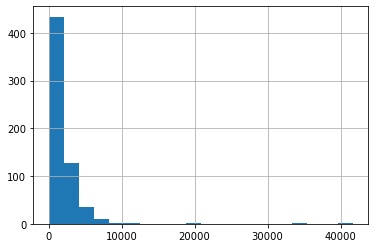

In [125]:
dataset['CoapplicantIncome'].hist(bins=20)

we can see that in general, Co-applicants have a lower income and barely earn more than 10,000 USD/month.

As a side-study, it could be interesting to know how he applicants' income varies by factors like their education.

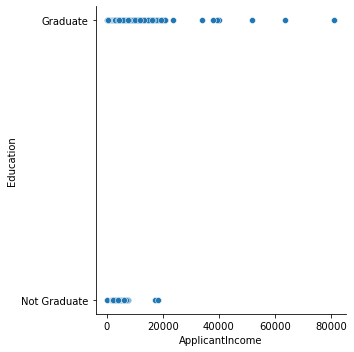

In [126]:
sns.relplot(x='ApplicantIncome', y='Education', data=dataset)

There seems to be some relation. Those who are college graduates, appear to have an average higher income.

We can also check other relationship between columns

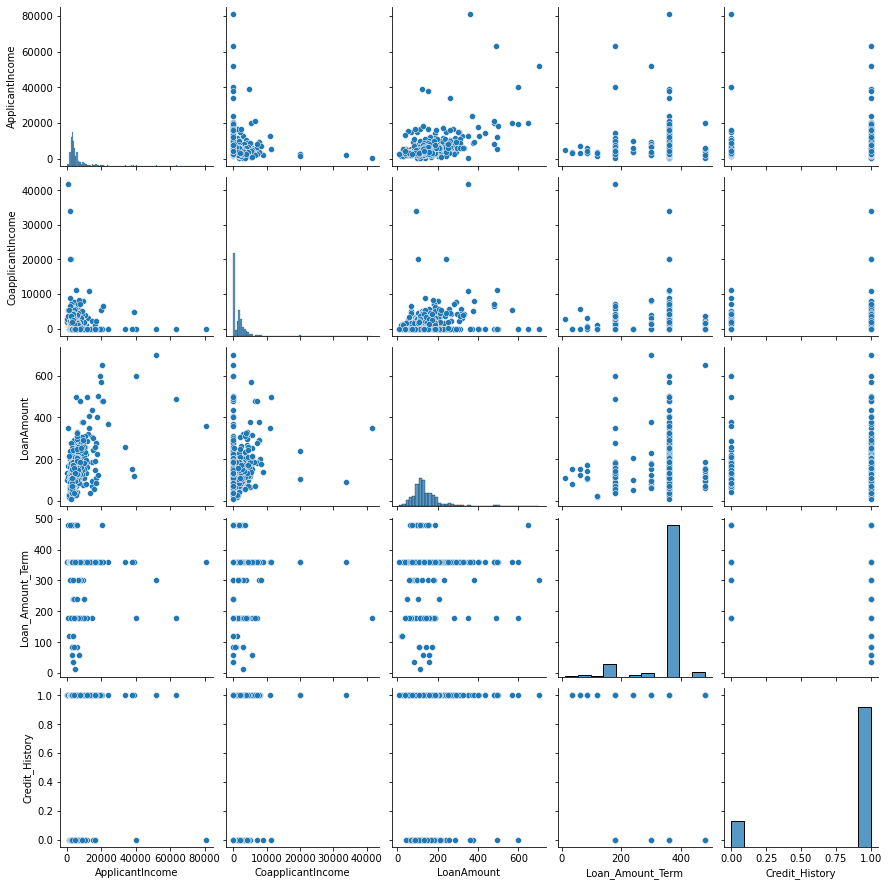

In [127]:
sns.pairplot(dataset)

The plots above are not showing strong correlations or at least not so strong to be visually clear. Hence, we will keep in mind that the Naive Bayes Classification (which has the assuption of independency of variables) can be a reasonable choice as the classifier here.

Let's also check the correlations in numeric values.


In [128]:
dataset.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


As can be seen, except the diagonal elements, there are not any numbers close to +1 or -1 among the correlations. Hence, this approves the choice of Naive Bayes Classification approach.

Now let us check the loan amount variable.

<AxesSubplot:>

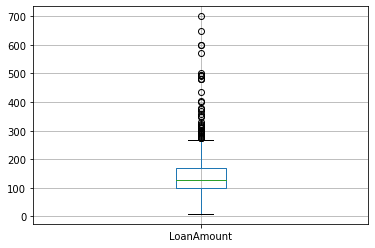

In [129]:
dataset.boxplot(column='LoanAmount')

Again, similar situation. Quite a few outliers that need to be dealt with later on.

<AxesSubplot:>

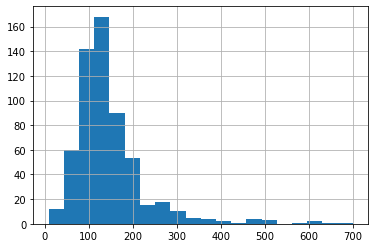

In [130]:
dataset['LoanAmount'].hist(bins=20)

Again, it is a bit right-skewed. Let's deal with this and normalize the data.

<AxesSubplot:>

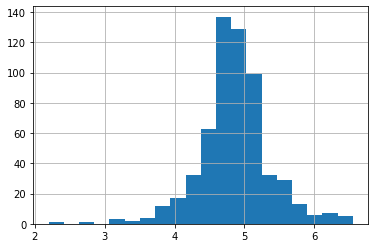

In [131]:
dataset['LoanAmount_log']=np.log(dataset['LoanAmount'])
dataset['LoanAmount_log'].hist(bins=20)

Now it looks a bit more normalized.

Let's go deal with null values now.

In [132]:
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
LoanAmount_log       22
dtype: int64

Let us start with Gender column. since gender is a categorical variable, we need to use the functions that suit this type, like 'mode' function. We will replcae the null values with the mode, which is the most frequent variable in the column.

In [133]:
dataset['Gender'].fillna(dataset['Gender'].mode()[0], inplace=True)

Let's do the same with other categorical columns.

In [134]:
dataset['Married'].fillna(dataset['Married'].mode()[0], inplace=True)

In [135]:
dataset['Dependents'].fillna(dataset['Dependents'].mode()[0], inplace=True)

In [136]:
dataset['Self_Employed'].fillna(dataset['Self_Employed'].mode()[0], inplace=True)

In [137]:
dataset['Loan_Amount_Term'].fillna(dataset['Loan_Amount_Term'].mode()[0], inplace=True)

In [138]:
dataset['Credit_History'].fillna(dataset['Credit_History'].mode()[0], inplace=True)

Okay. So far so good!

Let's go ahead with numerical missing values!

In [139]:
dataset.LoanAmount=dataset.LoanAmount.fillna(dataset.LoanAmount.mean())

In [140]:
dataset.LoanAmount_log=dataset.LoanAmount_log.fillna(dataset.LoanAmount_log.mean())

In [141]:
dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmount_log       0
dtype: int64

Okey, we are done with missing values without dropping out any records as we sought from the beginning.

Let's now normalize the incomes as well.

In [142]:
dataset['TotalIncome']=dataset['ApplicantIncome']+dataset['CoapplicantIncome']
dataset['TotalIncome_log']=np.log(dataset['TotalIncome'])

<AxesSubplot:>

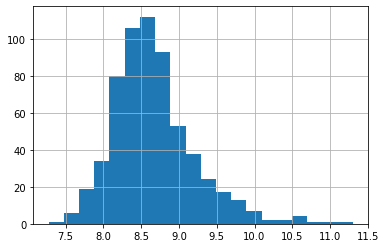

In [143]:
dataset['TotalIncome_log'].hist(bins=20)

Great! This looks much more normalized!

In [144]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,4.857444,5849.0,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,4.852030,6091.0,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,4.189655,3000.0,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4.787492,4941.0,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,4.948760,6000.0,8.699515


Now let's go to the fun part, which is applying machine learning techniques (here, ) to train a model and predict based on the trained model.

In [147]:
#Now we put the independent variables in X and the dependant in y
X=dataset.iloc[:,np.r_[1:5,9:11,13:15]].values
y=dataset.iloc[:,12].values

In [150]:
#now let's split the dataset into train and test datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=0)

In [151]:
print(X_train)

[['Male' 'Yes' '0' ... 1.0 4.875197323201151 5858.0]
 ['Male' 'No' '1' ... 1.0 5.278114659230517 11250.0]
 ['Male' 'Yes' '0' ... 0.0 5.003946305945459 5681.0]
 ...
 ['Male' 'Yes' '3+' ... 1.0 5.298317366548036 8334.0]
 ['Male' 'Yes' '0' ... 1.0 5.075173815233827 6033.0]
 ['Female' 'Yes' '0' ... 1.0 5.204006687076795 6486.0]]


We still have some non-numerical variables. So, we wil map them into numbers using encoding methods for our machine learning algorithm to be able to understand them.

In [168]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X=LabelEncoder()

In [169]:
for i in range(0,5):
        X_train[:,i]=labelencoder_X.fit_transform(X_train[:,i])

In [170]:
X_train[:,7]=labelencoder_X.fit_transform(X_train[:,7])

In [171]:
for i in range(0,5):
        X_test[:,i]=labelencoder_X.fit_transform(X_test[:,i])

In [172]:
X_test[:,7]=labelencoder_X.fit_transform(X_test[:,7])

In [173]:
labelencoder_y=LabelEncoder()
y_train=labelencoder_y.fit_transform(y_train)

In [174]:
labelencoder_y=LabelEncoder()
y_test=labelencoder_y.fit_transform(y_test)

Now let's scale the data for our machine learning model to be more comfortable with it.

In [175]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()


In [176]:
X_train=ss.fit_transform(X_train)
X_test=ss.fit_transform(X_test)

Now let's start the modeling part using a Decision Tree Classifier.

In [178]:
from sklearn.tree import DecisionTreeClassifier
DTClassifier=DecisionTreeClassifier(criterion='entropy',random_state=0)
DTClassifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [179]:
y_pred=DTClassifier.predict(X_test)
y_pred

array([0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1], dtype=int64)

Let's check the performance now.

In [186]:
from sklearn import metrics
print('The Accuracy of the Decision Tree:',metrics.accuracy_score(y_pred,y_test))

The Accuracy of the Decision Tree: 0.7073170731707317


Which is not bad, but not so great!

As I explained previously, the independency of the variables and lack of corrolation between columns leads me to conclude about the relevance of Naive Bayes Classification approach.

So, let's try this classifier and see how it performs in comparison to the decision tree classifier.

In [187]:
from sklearn.naive_bayes import GaussianNB
NBClassifier= GaussianNB()
NBClassifier.fit(X_train,y_train)

GaussianNB()

In [188]:
y_pred2=NBClassifier.predict(X_test)

In [190]:
print('The Accuracy of the Naive Bayes:',metrics.accuracy_score(y_pred2,y_test))

The Accuracy of the Naive Bayes: 0.8292682926829268


Great! So, I was right in my conjecture! We see a significant raise in the accuracy here with Naive Bayes Classifier!

Now, let's challenge the predictions against an external test dataset and see how the performance will be.

In [191]:
testdata2=pd.read_csv(r'C:\Users\HP\Downloads\loan-test.csv')

In [193]:
testdata2.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


As we can see, this data set does not have the loan result column. So, it's on us to predict that! Let's go ahead then!


We Should first clean the new test dataset and deal with the missing or invalid values.

In [194]:
testdata2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


This dataset has also some m issing values. Let's handle these missing values.

In [196]:
testdata2.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [226]:
testdata2['Gender'].fillna(testdata2['Gender'].mode()[0],inplace=True)

In [227]:
testdata2['Self_Employed'].fillna(testdata2['Self_Employed'].mode()[0],inplace=True)

In [228]:
testdata2['Dependents'].fillna(testdata2['Dependents'].mode()[0],inplace=True)

In [229]:
testdata2['Loan_Amount_Term'].fillna(testdata2['Loan_Amount_Term'].mode()[0],inplace=True)

In [230]:
testdata2['Credit_History'].fillna(testdata2['Credit_History'].mode()[0],inplace=True)

In [232]:
testdata2['LoanAmount'].fillna(testdata2['LoanAmount'].mean(),inplace=True)

In [233]:
testdata2.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

<AxesSubplot:>

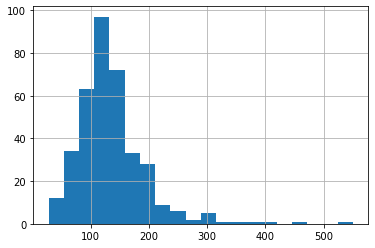

In [235]:
testdata2['LoanAmount'].hist(bins=20)

<AxesSubplot:>

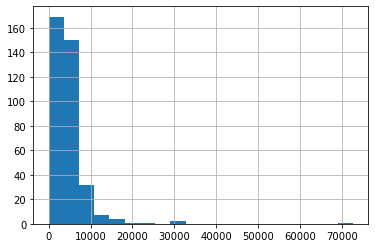

In [236]:
testdata2['ApplicantIncome'].hist(bins=20)

Both columns have a number of upper side outliers and are right skewed. Let's normalize the amounts in LoanAmount and ApplicantIncome columns to handle the issue of outliers.

In [237]:
testdata2['TotalIncome']=testdata2['ApplicantIncome']+testdata2['CoapplicantIncome']
testdata2['TotalIncome_log']=np.log(testdata2['TotalIncome'])

In [238]:
testdata2['LoanAmount_log']=np.log(testdata2['LoanAmount'])

In [239]:
test=testdata2.iloc[:,np.r_[1:5,9:11,13:15]].values

In [240]:
for i in range(0,5):
    test[:,i]=labelencoder_X.fit_transform(test[:,i])

In [241]:
test[:,7]=labelencoder_X.fit_transform(test[:,7])

Now, let us scale the new test dataset and perform the prediction for the new loan applicants!

In [242]:
test=ss.fit_transform(test)

In [243]:
new_pred=NBClassifier.predict(test)

In [244]:
new_pred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

So finally the new applicants can receive the results of their loan application!